# Исследовательский проект крупного онлайн магазина

### Описание проекта 

- Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
- Приоритизиреуем гипотезы, запустм A/B-тест и проанализируем результаты.
 
Есть данные о гипотезах, их краткое описание с охватом пользователей и оценкой влияния

Также есть датасет о пользователях, заказах, выручке. Определены группы для проведения A/B тестирования, указаны даты.

### Цель проекта:

Узнаем, как изменилась приоритизация гипотез при применении RICE и ICE. Сделаем выводы.

Проанализировать A/B-тест:

- Построим график кумулятивной выручки по группам. 
- Построим график кумулятивного среднего чека по группам. 
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построим график кумулятивного среднего количества заказов на посетителя по группам. 
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построим точечный график количества заказов по пользователям.
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 
- Построим точечный график стоимостей заказов.  
- Посчитаем 95-й и 99-й перцентили стоимости заказов.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Примем соответствующее решение  :
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### План работы: 

- Загрузить данные
- Произвести предобработку данных. Проверить на пропуски значений, дубликаты, ошибки типов данных.
- Применим приоритезации гипотез
- Проанализируем A/B тест
- Сделаем выводы.

### Импорт библиотек 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

import warnings
warnings.filterwarnings(action='ignore')

### Шаг №1. Загрузка данных

In [2]:
try:
    hypothesis = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\hypothesis.csv')
    orders = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\orders.csv')
    visitors = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')


In [3]:
display('Данные о гипотезах', hypothesis)
display('Данные о заказах', orders)
display('Данные о посещениях', visitors)

'Данные о гипотезах'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


'Данные о заказах'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


'Данные о посещениях'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [4]:
display('Данные о гипотезах', hypothesis.info())
display('Данные о заказах', orders.info())
display('Данные о посещениях', visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


'Данные о гипотезах'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Данные о заказах'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Данные о посещениях'

None

Итоги обзора :
- типы данных с датой не приведены к нужному формату
- наименования стобцов в разном регистре, без пробелов
- пропусков данных не обнаружено

Данные hypothesis:

- hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по  10-балльной шкале
- Confidence — уверенность в гипотезе по  10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезыпо 10-балльной шкале

Данные orders:

- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ

Данные visitors:

- date — дата
- group — группа A/B-теста
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг №2. Обработка данных

Наименования столбцов приведем к нужному регистру.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

display(hypothesis.columns)
display(orders.columns)
display(visitors.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

Разделим нижним подчеркиванием.

In [6]:
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}) 
display(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Приведем столбцы с датами к нужному формату

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

display(orders['date'].dtypes)
display(visitors['date'].dtypes)

dtype('<M8[ns]')

dtype('<M8[ns]')

Посчитаем наличие явных и неявных дубликатов, так как данные привели к общему регистру

In [8]:
display('Данные о гипотезах', hypothesis.duplicated().sum())
display('Данные о заказах', orders.duplicated().sum())
display('Данные о посещениях', visitors.duplicated().sum())

'Данные о гипотезах'

0

'Данные о заказах'

0

'Данные о посещениях'

0

Проверим попадают ли пользователи одновременно в две группы.

In [9]:
visitorAB = orders.groupby('visitor_id').agg({'group':'sum'}).reset_index()
visitorAB['visitor_id'].count()

1031

In [10]:
visitorAB[(visitorAB.group == 'AB') | (visitorAB.group == 'BA')].count()

visitor_id    35
group         35
dtype: int64

### Шаг №3. Приоритизация гипотез

- Применим ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета
- Применим RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Создаем новый столбец ice и отсортируем по убыванию приоритета

In [11]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее приоритетные гипотезы по ICE:

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Создаем новый столбец rice и отсортируем по убыванию приоритета

In [14]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетные гипотезы по RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа- 
- 
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Вывод:
- Наболее перспективная гипотеза по ICE под номером 8 оказалась на пятом месте при расчете RICE. Можем обьяснить это показателем reach(охват) - количество пользователей, которое затронет изменение. Этот показатель также оказал влияние и на другие гипотезы. Учитывая результаты приоритизаций гипотез наиболее важными считаем:

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Шаг №4. Анализ A/B-теста

#### График кумулятивной выручки по группам

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [  'date',
                            'group',
                            'orders',
                            'buyers',
                            'revenue',
                            'visitors'  ]

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных

In [16]:
display('Максимальные даты')
display(cumulativeData['date'].max())
display(orders['date'].max())

'Максимальные даты'

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [17]:
display('Минимальные даты')
display(cumulativeData['date'].min())
display(orders['date'].min())

'Минимальные даты'

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-01 00:00:00')

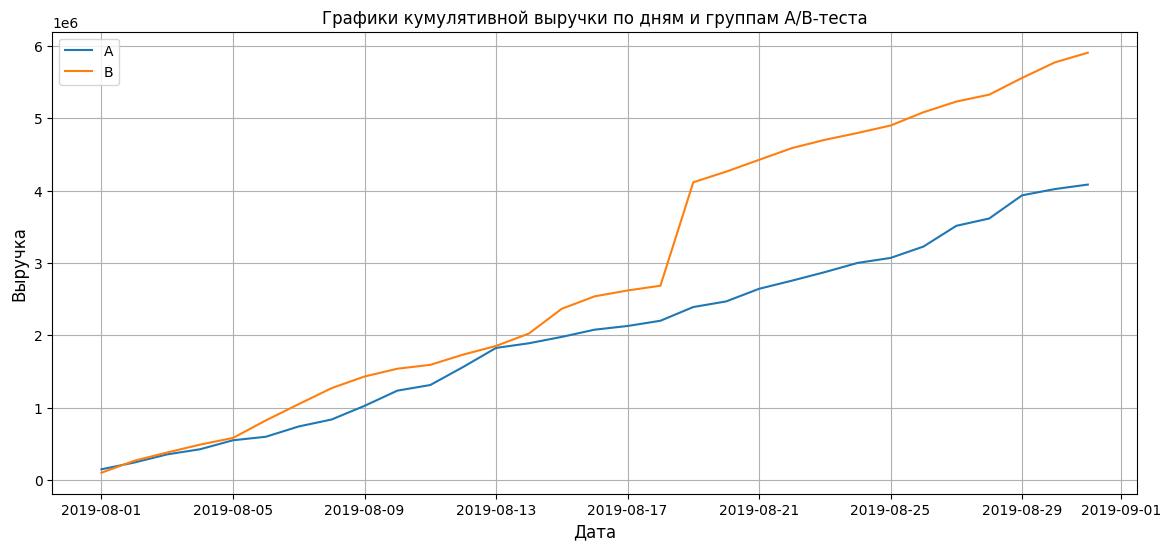

In [42]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA  = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB  = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(14, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.legend() 
plt.show()

Вывод: Выручка равномерно увеличивается в обеих группах за весь период. График выручки группы B в одной точке резко вырос, возможно был рост числа заказов, или о повышение стоимости заказов в выборке в этот конкретный период.

#### График кумулятивного  среднего чека по группам.

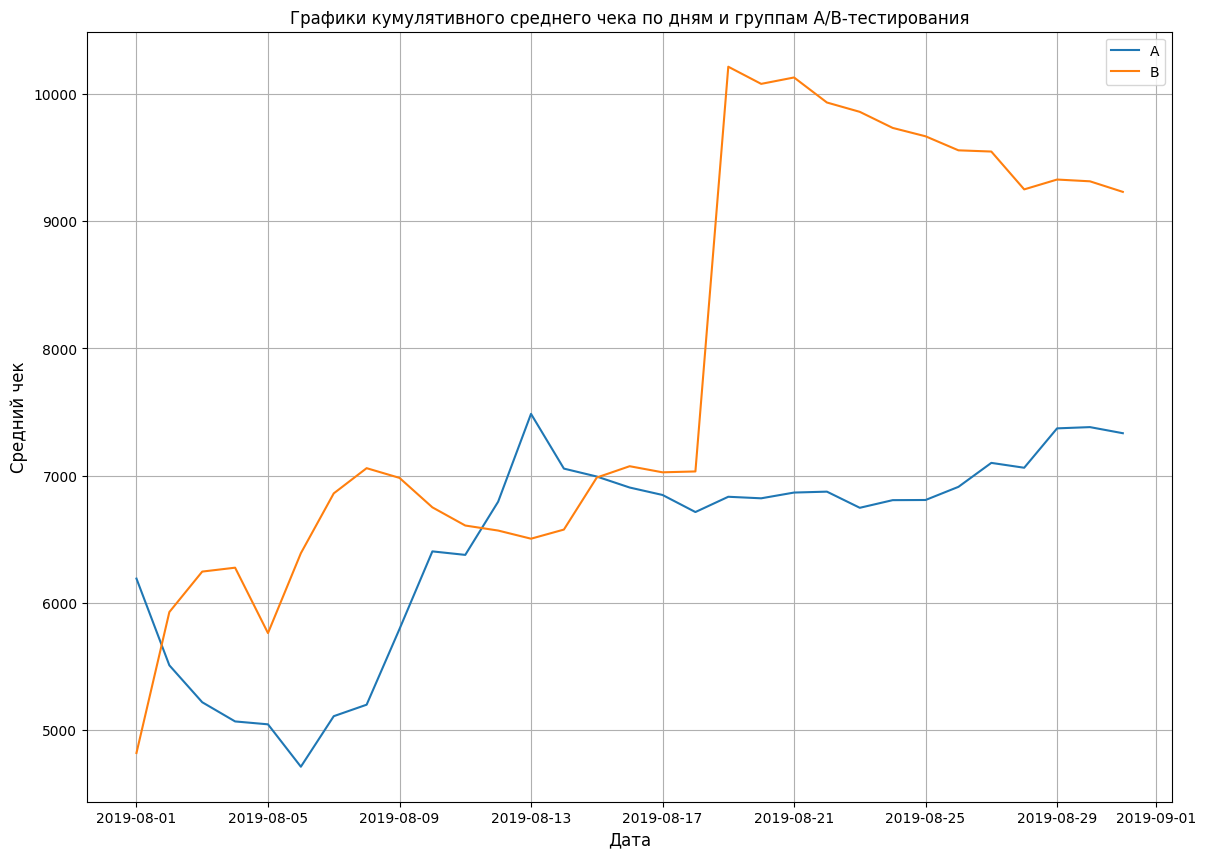

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.legend() 
plt.show()

Вывод:

Группа А - средний чек вначале резко упал, далее наблюдается резкий рост, стабилизировался в значениях спустя 20 дней. Группа В - средний чек в группе B в одной точке резко вырос, как и выручка. Далее видна линия к снижению среднего чека в этой группе. Наблюдаются значительно разные показатели среднего чека между группами. В группе "В" более 9000Р, а группе "А" около 7000Р.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

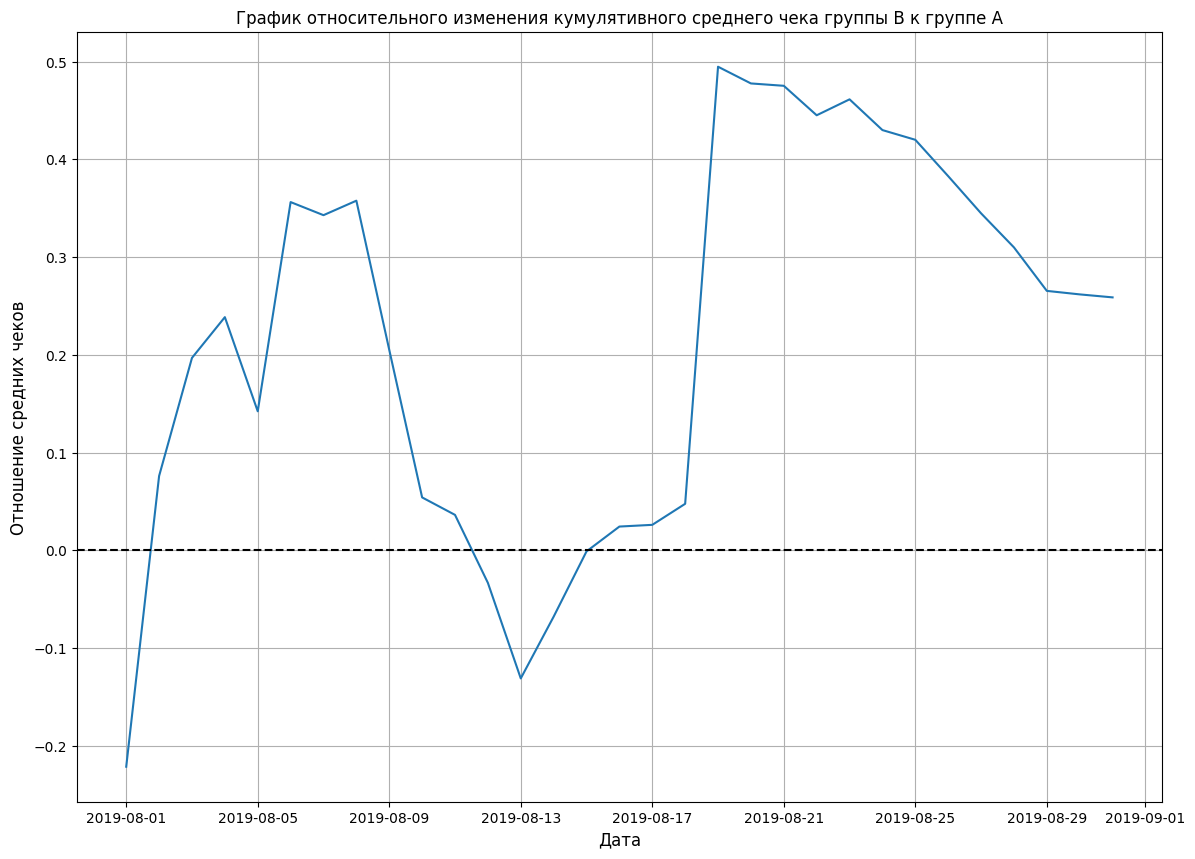

In [20]:
# собираем данные в одном датафрейме
cumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(14, 6))

# cтроим отношение средних чеков
plt.plot(cumulativeRevenue['date'],(cumulativeRevenue['revenueB']/cumulativeRevenue['ordersB'])/
                                   (cumulativeRevenue['revenueA']/cumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

Вывод: Заметны резкие скачки среднего чека, график показывает себя очень нестабильно, вероятно есть очень крупные заказы.

#### График кумулятивного среднего количества заказов на посетителя по группам

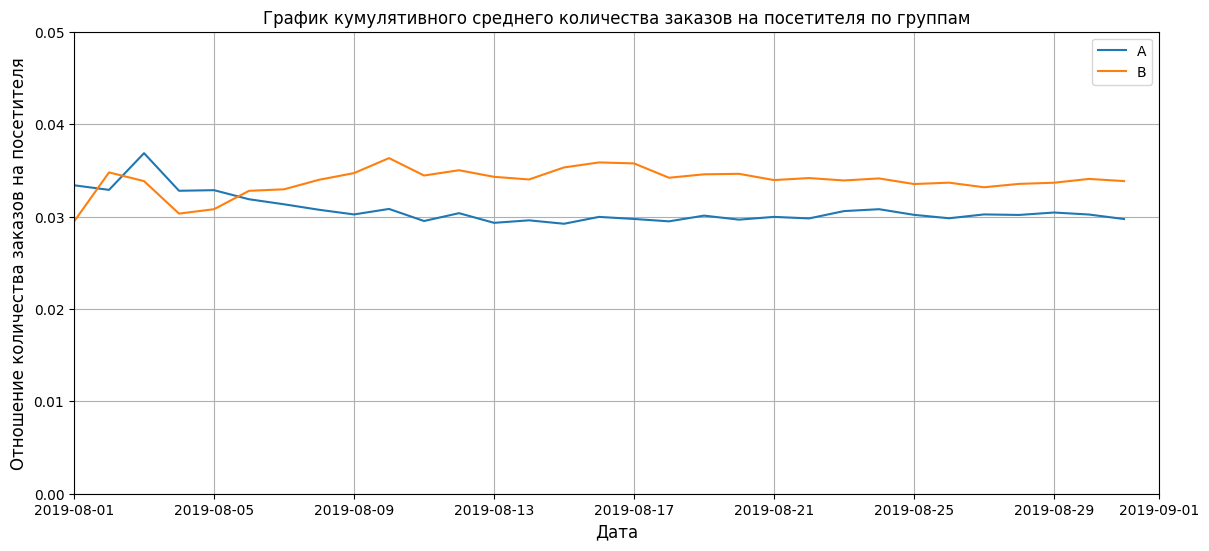

In [43]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# задаём размер для графика
plt.figure(figsize=(14, 6))

# строим графики
plt.grid(visible=True)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение количества заказов на посетителя', fontsize=12)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.050]) 

plt.legend();


Вывод :
Группы колебались около одного значения первые 5 дней, но затем у группы В среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы А — снизилось, заетм зафиксировалось.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

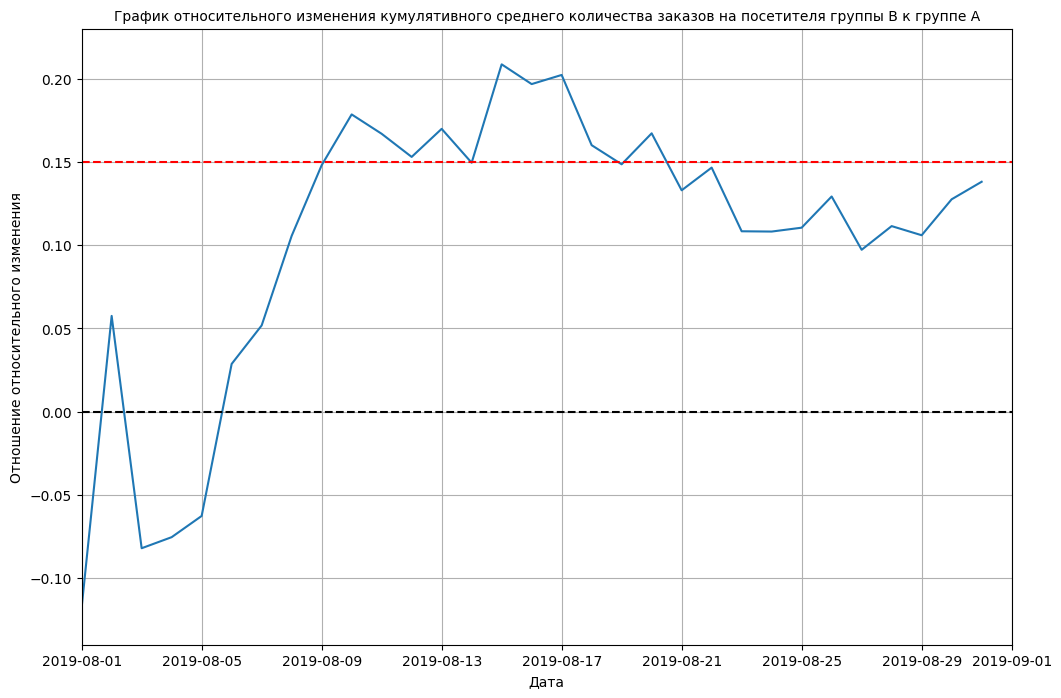

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(14, 6))

plt.grid(visible=True)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.14, 0.23])

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=10)
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Отношение относительного изменения', fontsize=10)
plt.show();

Вывод: В начале теста группа B проигрывала группе A, затем резко возрастает и стабилизируется в районе 11-14 %. Делать какие-либо выводы по тесту рано. Необходимо проанализировать аномалии, возможно получим другую версию событий.

#### Точечный график количества заказов по пользователям.

В начале создадим датафрейм отражающий количество заказов на каждого пользователя

In [23]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})   
)
ordersByUsers.columns = ['transaction_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,transaction_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим гистрограмму распределения количества заказов на одного пользователя.

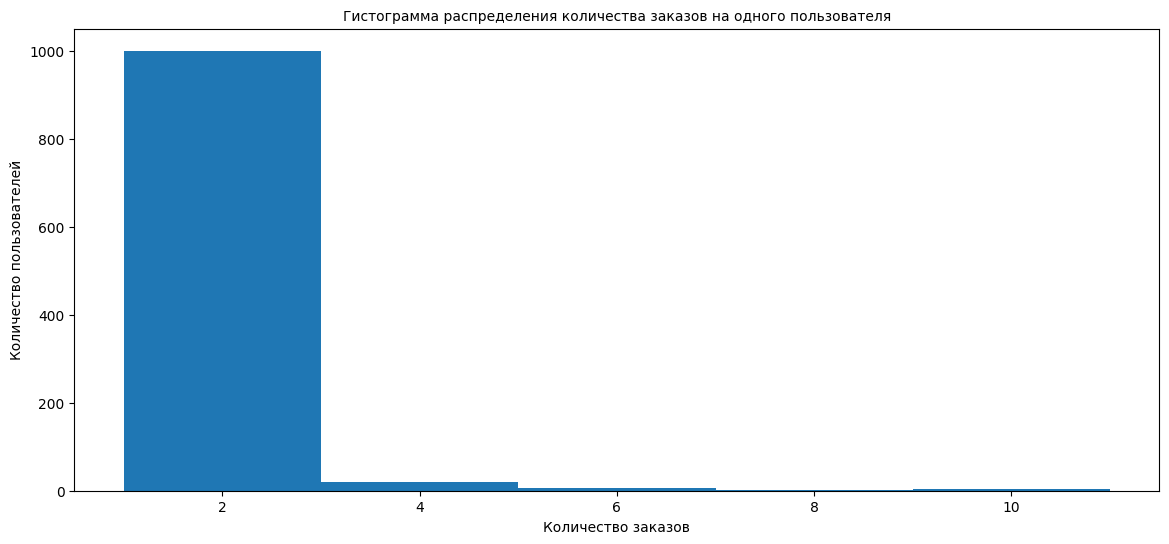

In [44]:
plt.figure(figsize=(14, 6))
plt.hist(ordersByUsers['orders'],bins=5)
plt.title('Гистограмма распределения количества заказов на одного пользователя', fontsize=10)
plt.xlabel('Количество заказов', fontsize=10)
plt.ylabel('Количество пользователей', fontsize=10);

Вывод: Можно заметить, что приемущественно пользователи совершают 2 заказа, однако есть пользователи которые совершили более 6 и даже 10 заказов, возможно это и есть причина колебаний на графиках

Построим точечную диаграмму числа заказов на одного пользователя

In [25]:
ordersByUsers_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers_A.columns = ['transaction_id', 'orders']

ordersByUsers_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers_B.columns = ['transaction_id', 'orders']


True


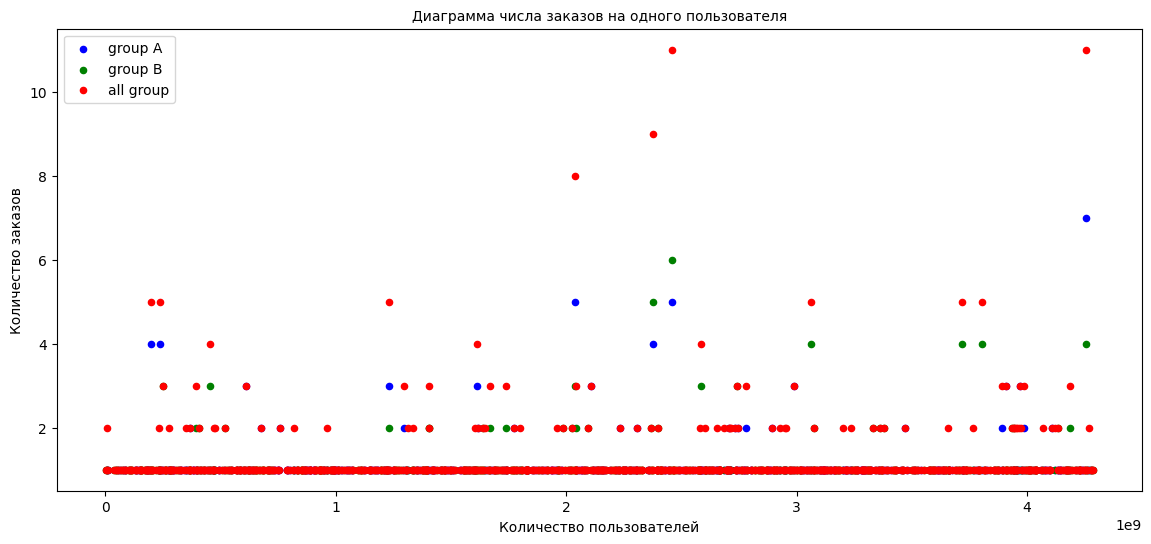

In [45]:
ax1 = ordersByUsers_A.plot(kind='scatter', x='transaction_id',y='orders',figsize=(14, 6), color='blue',label="group A")

ax2 = ordersByUsers_B.plot(kind='scatter', x='transaction_id',y='orders',figsize=(14, 6), color='green',ax=ax1,label="group B")

ax3 = ordersByUsers.plot(kind='scatter', x='transaction_id',y='orders',figsize=(14, 6), color='red', ax=ax1,label="all group")


plt.title('Диаграмма числа заказов на одного пользователя', fontsize=10)
plt.xlabel('Количество пользователей', fontsize=10)
plt.ylabel('Количество заказов', fontsize=10);


print(ax1 == ax2 == ax3) # True

Вывод: На диаграмме стало понятнее распределение заказов, приемущественнее пользователи совершают 1 заказ, так же значительное количество пользователей совершивших 2-3 заказа. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

####  95-й и 99-й перцентили количества заказов на пользователя

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз. Выберем 4 заказа на пользователя как нижнюю границу, остальные будем считать аномалиями

#### Точечный график стоимостей заказов

Посмотрим топ 10 по стоимости заказов

In [28]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Первые два заказа явно превышают следующие показатели, посмотрим на гистограмму.

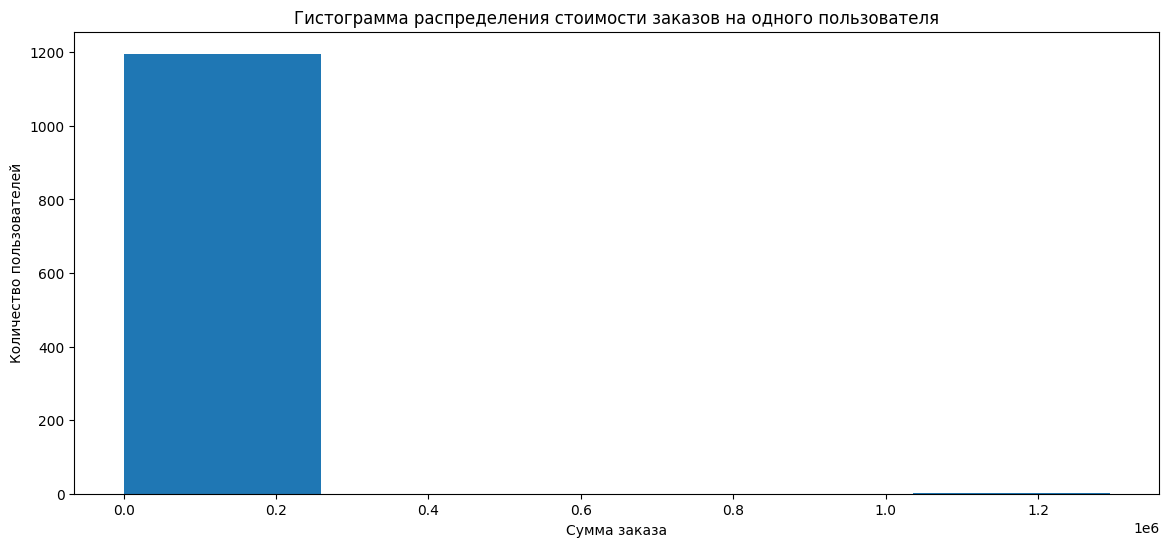

In [48]:
plt.figure(figsize=(14, 6))
plt.hist(orders['revenue'], bins=5)
plt.title('Гистограмма распределения стоимости заказов на одного пользователя', fontsize=12)
plt.xlabel('Сумма заказа', fontsize=10)
plt.ylabel('Количество пользователей', fontsize=10);

Гистограмма тоже дает мало информации, построим точечную диаграмму

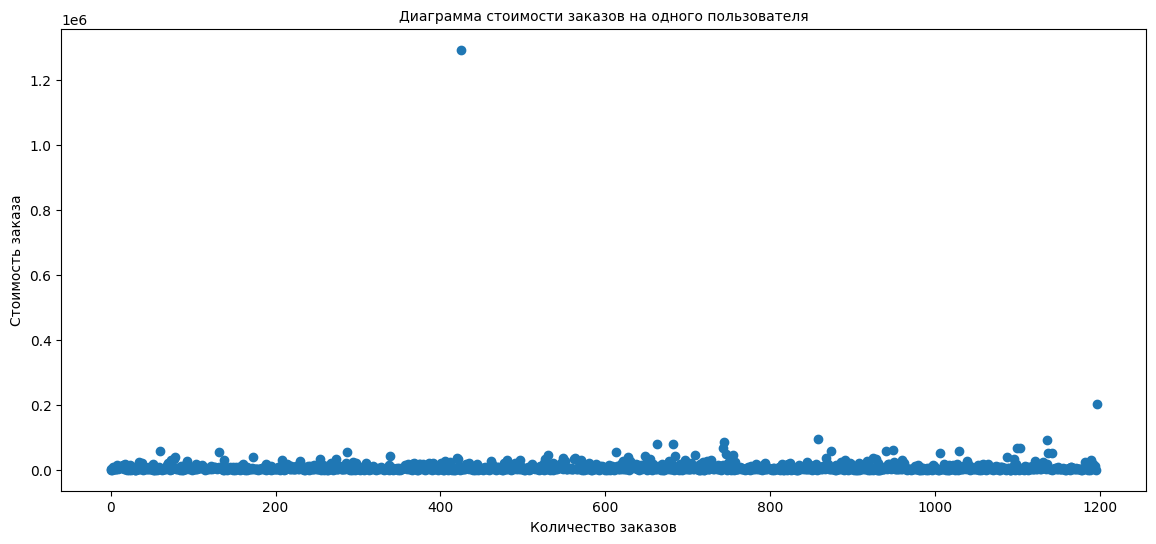

In [49]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма стоимости заказов на одного пользователя', fontsize=10)
plt.xlabel('Количество заказов', fontsize=10)
plt.ylabel('Стоимость заказа', fontsize=10);

Попробуем ограничить стоимость заказов, чтобы больше понять в каком диапазоне находятся основное количество пользователй

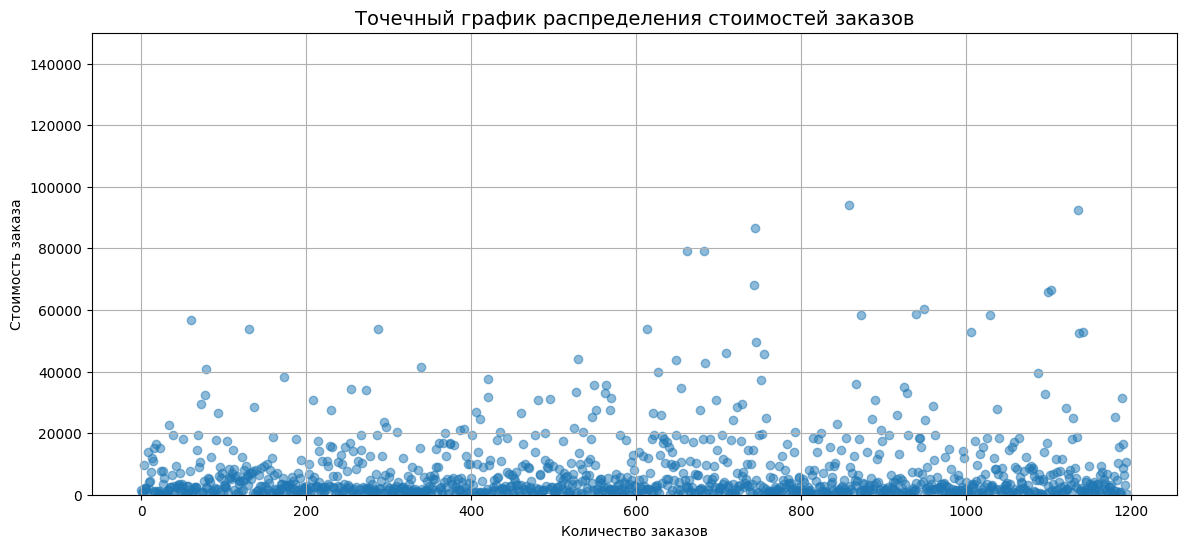

In [50]:
plt.figure(figsize=(14, 6))
plt.grid(visible=True)
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 150000)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=10)
plt.xlabel('Количество заказов', fontsize=10)
plt.show()

В таком масштабе видно, что основная масса пользователей совершает покупки не более чем на сто тысяч. 

#### 95-й и 99-й перцентили стоимости заказов.

In [32]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли заказ на стоимость больше чем 28000. И 1% пользователей заказывали более чем на 58233.2 За нижнюю границу можно выбрать стоимость заказа в 28000 и убрать аномальные заказы по этой границе

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. 

Нулевая: Статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

Альтернативная: Статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

Установим статистическую значимость alpha = 0.05

Начнём с подготовки данных.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

display(ordersByUsersA.sort_values(by='orders',ascending =False).head())
display(ordersByUsersB.sort_values(by='orders',ascending =False).head())

,user_id,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


,user_id,orders
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
                    axis=0)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [36]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('различие в среднем количестве закзов между группами по «сырым» данным =', '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
различие в среднем количестве закзов между группами по «сырым» данным = 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный проигрыш группы B равен 13.8% 

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 

Нулевая: различий в среднем чеке между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [37]:
print('p-value =', '{0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                 orders[orders['group']=='B']['revenue'])[1]))

print('различие в среднем чеке между группами по «сырым» данным =', '{0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/
              orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
различие в среднем чеке между группами по «сырым» данным = 0.259


p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно больше среднего чека группы A. Возможно это связано с аномальными данными.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

95-й и 99-й перцентили средних чеков равны 28000 и 58233.2  

95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28000. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей 

- с числом заказов больше 4 — usersWithManyOrders 
- совершивших заказы дороже 28000 — usersWithExpensiveOrders. 

Объединим их в таблице abnormalUsers. 

А также узнаем, сколько всего аномальных пользователей методом shape()

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 95)]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'], 95)]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Количество аномальных пользователей: 74


Вывод : Количество аномальных пользователей - 74. 

Определим, как они повлияли на результаты статистической значимости. Проверим показатели по очищенным данным. 

Сначала подготовим выборки количества заказов по пользователям по группам теста

In [39]:
sampleAFiltered = pd.concat([
                             ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')
                            ],
                            axis=0)

sampleBFiltered = pd.concat([
                            ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                            pd.Series(0,
                                      index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                      name='orders')
                            ],
                            axis=0)

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем количестве заказов между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [40]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие среднем количестве закзов между группами по «очищенным» данным:','{0:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.013
Относительное различие среднем количестве закзов между группами по «очищенным» данным: 0.173


Вывод: p-value = 0.013, что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами можно отвергнуть. По «сырым» данным p-value был равен 0.017. Среднее количество заказов группы В больше среднего группы А. Относительное различие в количестве заказов между группами по «сырым» данным было равно 0.138. Результаты по «очищенным» данным незначительно отличаются от результатов по «сырым» данным

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы.

Нулевая: различий в среднем чеке между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [41]:
print('p-value =','{0:.3f}'.format(
    
        stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                 np.logical_not(orders['visitor_id'].isin(abnormalUsers)))
                                 ]['revenue'],
                           orders[np.logical_and(orders['group'] == 'B',
                                                 np.logical_not(orders['visitor_id'].isin(abnormalUsers)))
                                 ]['revenue'],
                          )[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',"{0:.3f}".format(
    
            orders[np.logical_and(orders['group'] == 'B',
                                  np.logical_not(orders['visitor_id'].isin(abnormalUsers)))
                  ]['revenue'].mean()
          / orders[np.logical_and(orders['group'] == 'A',
                                  np.logical_not(orders['visitor_id'].isin(abnormalUsers)))
                  ]['revenue'].mean()
        - 1))

p-value = 0.738
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.020


Вывод: p-value = 0.738, что больше 0.05. Нулевую гипотезу не отвергаем. По «сырым» данным p-value был равен 0.729. 

Однако по «очищенным» данным средний чек группы А больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между было 0.259.

#### Общий вывод:

Задачей исследования было:

- Узнать как изменилась приоритизация гипотез при применении RICE и ICE
- Проанализировать A/B-тест.

В ходе исследования была вополнена предобработка данных:

- Замена названия столбцов, приведение их к нижнему регистру и правильному стилю
- Приведение к правильному типу данных в столбцах, содержащих информацию о дате и времени.

В ходе приоритизирования гипотез определены наиболее важные из них:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(гипотеза №7)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(гипотеза №0)
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(гипотеза №6)

Основные положения анализа результатов A/B-теста:

- Кумулятивный средний чек группы В выше среднего чека группы А на 25.9% к концу теста

- Кумулятивное количество заказов группы В выше количества заказов группы А на 13.8% к концу теста

- Не более 5% от всех пользователей оформляли больше чем 2 заказа, 1% пользователей оформляли заказ более 4 раз

- Не более 5% от всех заказов имеют стоимость больше чем 28 000 рублей, 1% заказов - более 58 233 рублей

Статистически значимое различие по количеству заказов между группами присутствует как по «сырым» данным, так и по данным после фильтрации аномалий.

- Относительное различие в среднем количестве заказов между группами (отношение среднего количества заказов  группы В к среднему количеству заказов  группы А): 0.138 по «сырым» данным и 0.173 по «очищенным» данным

Статистически значимого различия по среднему чеку между группами нет.

- Относительное различие в среднем чеке между группами (отношение среднего чека группы В к среднему чеку группы А): 0.259 по «сырым» данным и -0.020 по «очищенным» данным

График различия количества заказов между группами показывает, что результаты группы B лучше группы A и есть динамика к улучшению.

График различия среднего чека показывает , что результаты группы B направлены к снижению, повлияло наличие крупных заказов. По «очищенным» данным средний чек группы А оказался больше среднего чека группы В.

**Итог**: После выполнения исследования, тест следует продолжить. Количество заказов группы B лучше A, но, есть основания полагать, что пристутствует тенденция к снижению среднего чека группы В. Требуется больше времени понаблюдать за этим показателем.